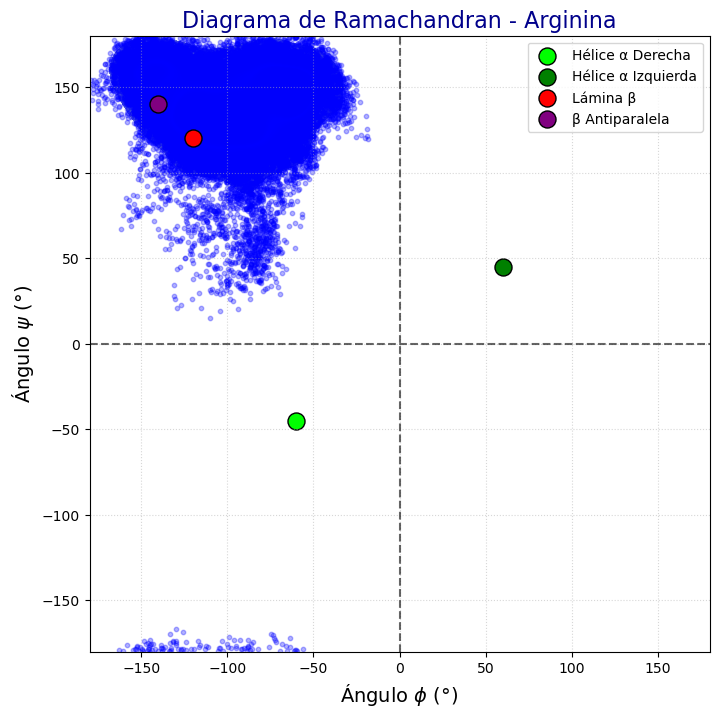

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Función para leer los ángulos desde los archivos .dat
def read_angles(file):
    return np.loadtxt(file, comments='#', usecols=[1])  # Se asume que los ángulos están en la segunda columna

# Archivos de entrada (ajusta los nombres si es necesario)
phi_file = "phi-arg-3.dat"
psi_file = "psi-arg-3.dat"

# Leer los ángulos
phi = read_angles(phi_file)
psi = read_angles(psi_file)

# Crear la figura
plt.figure(figsize=(8, 8))

# Mapa de densidad con KDE
sns.kdeplot(x=phi, y=psi, cmap="coolwarm", fill=True, levels=50, alpha=0.8)

# Agregar puntos de dispersión con transparencia
plt.scatter(phi, psi, c="blue", alpha=0.3, s=10)

# 🔹 Regiones de conformaciones secundarias 🔹
regions = {
    "Hélice α Derecha": {"center": (-60, -45), "color": "lime"},
    "Hélice α Izquierda": {"center": (60, 45), "color": "green"},
    "Lámina β": {"center": (-120, 120), "color": "red"},
    "β Antiparalela": {"center": (-140, 140), "color": "purple"}  # Posición representativa para β antiparalela
}

# Dibujar las regiones y puntos
for label, data in regions.items():
    plt.scatter(data["center"][0], data["center"][1], color=data["color"], s=150, edgecolors='black', label=label)

# Etiquetas y formato
plt.title("Diagrama de Ramachandran - Arginina", fontsize=16, color="darkblue")
plt.xlabel(r'Ángulo $\phi$ (°)', fontsize=14)
plt.ylabel(r'Ángulo $\psi$ (°)', fontsize=14)

# Líneas de referencia
plt.axhline(0, color='black', linestyle='dashed', alpha=0.6)
plt.axvline(0, color='black', linestyle='dashed', alpha=0.6)

# Ajustar límites y cuadrícula
plt.xlim([-180, 180])
plt.ylim([-180, 180])
plt.grid(linestyle='dotted', alpha=0.5)

# Mostrar leyenda
plt.legend()

# Guardar el gráfico en un archivo
plt.savefig("diagrama_ramachandran_arginina.png", dpi=300, bbox_inches='tight')

# Mostrar la gráfica
plt.show()
